Gradient Descent:  [ 340397.96353532] [ 109848.00846026] [-5866.45408497]


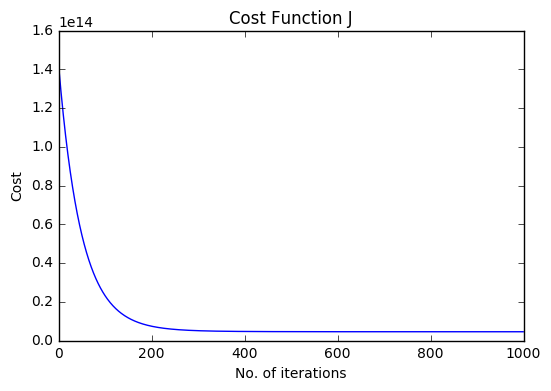

In [221]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math

# Input data files are available in the same directory as the .py file
# Any results you write to the current directory are saved as output
import os
tmp = os.listdir(r"C:\Users\wuh00\ML_implementation\Linear_Regression_Gradient_Descent")
[x.encode('utf-8') for x in tmp]

# Load the libraries and data...
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('Sample Data.txt',header=None, index_col=False)
# print(data)


# define functions
def normalize_features(x):
    m = len(x) #  find size of the sample = m
    #  formula implementation x_norm = m x n, x = m x n, mean(x) and std(x), 
    #  which are 1 x n, need to be m x n, use np.tile
    x_norm = (x - np.tile(x.mean(),[m,1])) / np.tile(x.std(),[m,1])     
    return x_norm

def compute_cost_mean_square(theta,x_norm,y):
    [m,n] = x_norm.shape
    h = np.dot(x_norm,theta) # h = x*theta which has size of m x 1.
    # computation  
    J = (1/2*m) * np.sum(np.square(h-y))    
    return J

def gradient_descent_lr(theta,x_norm,y,alpha,num_iters): 
    [m,n] = x_norm.shape    
    past_costs = []
    for idx in range(num_iters):       
        theta = theta - (alpha/m) * np.dot(((np.dot(x_norm,theta))-y).transpose(),x_norm).transpose()
        J = compute_cost_mean_square(theta,x_norm,y)   
        past_costs.append(J)
    return theta,past_costs

# Grab the relevant data, scale the predictor variable, 
# and add a column of 1s for the gradient descent...
y = data.iloc[:,-1]
# y = data.iloc[:,-1].values
y = np.array([y]).transpose()

x_norm = normalize_features(data.iloc[:,0:-1])
[m,n] = x_norm.shape # number of samples = m, number of features = n
x_ones = np.ones((m,1))
x_norm = np.concatenate((x_ones,x_norm),axis=1)

# other parameters
[m,n] = x_norm.shape
theta = np.zeros((n,1))
alpha = 0.01   #learning rate
iterations = 1000   #No. of iterations


#Pass the relevant variables to the function and get the new values back...
theta,past_costs = gradient_descent_lr(theta,x_norm,y,alpha,iterations)
# print(theta)
# print(cost)

#Print the results...
print("Gradient Descent: ",theta[0], theta[1],theta[2])

#Plot the cost function...
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()